In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%config inlineBackend.figure_format = 'svg'

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd

In [14]:
df = pd.read_csv('../data/titanic_train.csv')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows',100)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


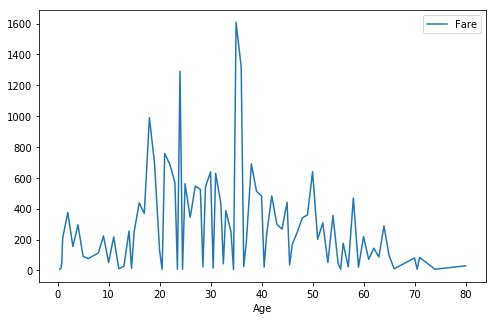

In [15]:
Fare_df = df[[x for x in df.columns if 'Fare' in x]+['Age']]
Fare_df.groupby('Age').sum().plot()

In [16]:
print(df.shape)

(891, 12)


In [17]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


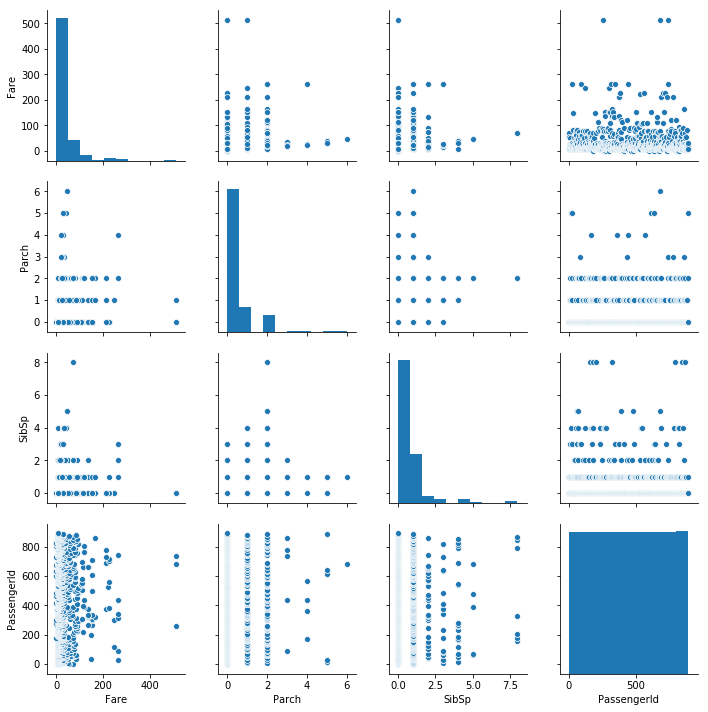

In [21]:
cols = ['Fare','Parch','SibSp','PassengerId']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')

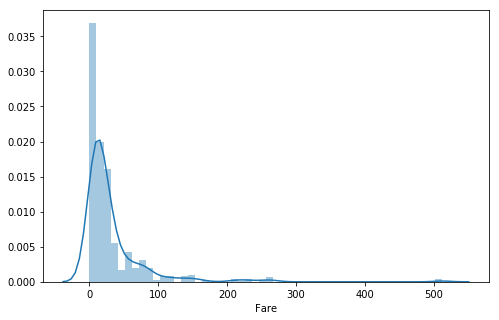

In [22]:
sns.distplot(df.Fare)

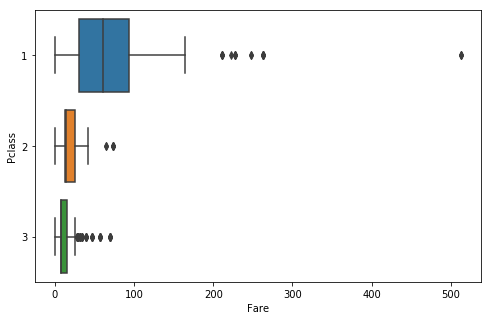

In [23]:
top_Pclass = df.Pclass.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="Pclass", x="Fare", data=df[df.Pclass.isin(top_Pclass)],orient="h")

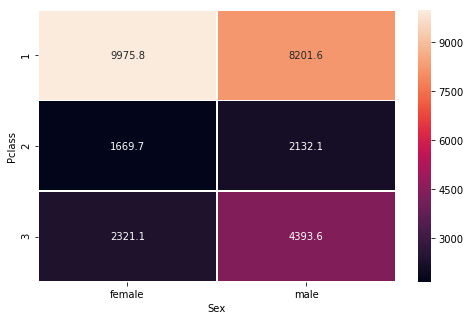

In [24]:
Pclass_Sex_Fare = df.pivot_table(
index='Pclass',
columns='Sex',
values='Fare',
aggfunc=sum ).fillna(0).applymap(float)
sns.heatmap(Pclass_Sex_Fare, annot=True, fmt=".1f",linewidths=.5)

In [26]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go 

init_notebook_mode(connected=True)

In [1]:
t = df.groupby('Pclass')[['Fare']].max().join(
    df.groupby('Pclass')[['Age']].mean()
)


t.columns = ['Pclass_max_fare', 'Pclass_mean_age']


trace0 = go.Scatter(
    x=t.index,
    y=t.Pclass_max_fare,
    name='Max fare'
)


trace1 = go.Scatter(
    x=t.index,
    y=t.Pclass_mean_age,
    name='Average age'
)

data = [trace0, trace1]
layout = {'title': 'Statistics of Pclass'}

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

NameError: name 'df' is not defined

In [35]:
t = df.groupby('Embarked')[['Fare']].max().join(
    df.groupby('Embarked')[['Age']].mean()
)


t.columns = ['Embarked_max_fare', 'Embarked_mean_age']


trace0 = go.Bar(
    x=t.index,
    y=t.Embarked_max_fare,
    name='Max fare'
)


trace1 = go.Bar(
    x=t.index,
    y=t.Embarked_mean_age,
    name='Average age'
)

data = [trace0, trace1]
layout = {'title': 'Statistics of Embarked'}

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [36]:
data = []
for embarked in df.Embarked.unique():
    data.append(
        go.Box(y=df[df.Embarked == embarked].Fare, name=embarked)
    )
iplot(data)